# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata,study_results, on ="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [122]:
# Checking the number of mice.
mice_number = combined_data_df ["Mouse ID"].nunique()
mice_number

249

In [124]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"], keep = False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [126]:
# Optional: Get all the data for the duplicate mouse ID.
#duplicate_data = combined_data_df[combined_data_df['Mouse ID'].isin(duplicates)]
#duplicate_data
# Identifying duplicate entries by Mouse ID and Timepoint
duplicate_mice = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display all data for the duplicate Mouse ID
duplicate_mice_details = duplicate_mice[duplicate_mice["Mouse ID"] == duplicate_mice["Mouse ID"].iloc[0]]
duplicate_mice_details

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [128]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_mouse_id = combined_data_df.drop(combined_data_df[combined_data_df["Mouse ID"]=="g989"].index)
drop_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [130]:
# Checking the number of mice in the clean DataFrame.
mice_number2 = drop_mouse_id ["Mouse ID"].nunique()
mice_number2

248

In [132]:
mean_sum = drop_mouse_id.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean_sum

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

## Summary Statistics

In [135]:
summary_stats = drop_mouse_id.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)
summary_stats

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [138]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


In [140]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Generate summary statistics (mean, median, variance, standard deviation, and SEM of the tumor volume) for each regimen
summary_stats = drop_mouse_id.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    variance="var",
    std_dev="std",
    sem="sem"
)

# Display the summary statistics table
summary_stats

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

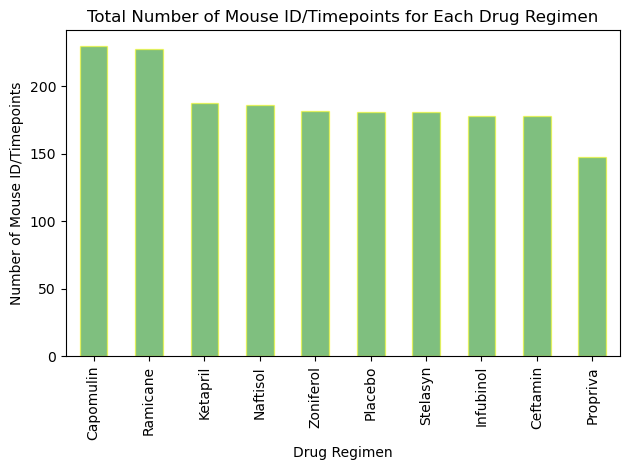

In [143]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#regimen = pd.
regimen_counts = drop_mouse_id["Drug Regimen"].value_counts()
#Create a bar plot
regimen_counts.plot(kind='bar', color='green', edgecolor= 'yellow', alpha=0.5, align="center")

#Add labels and title
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
#Display the plot
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

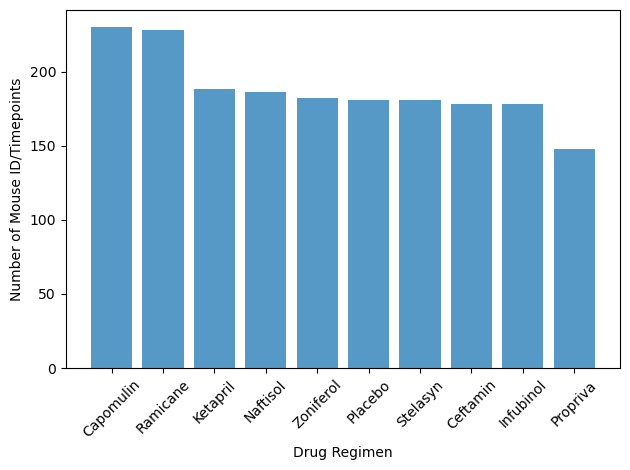

In [145]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#drug_regi = list(drop_mouse_id["Drug Regimen"].unique())
yvalues = drop_mouse_id.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)
plt.bar(yvalues.index,yvalues, alpha=0.75, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

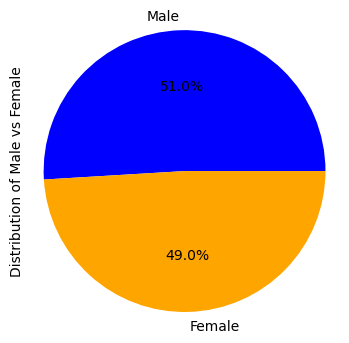

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


In [147]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
#gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'purple'], figsize=(4,4))
#plt.ylabel("Distribution of Male vs Female")
#plt.axis('equal')
#plt.show()
gender_counts= drop_mouse_id['Sex'].value_counts()
labels = ["Females", "Males"]
gender = drop_mouse_id.groupby("Sex")["Mouse ID"].nunique()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], figsize=(4,4))
plt.ylabel("Distribution of Male vs Female")
plt.axis('equal')
plt.show()
#Make the pie chartplt.pie(gender, labels= labels, autopct="%1.1f%%", shadow=True)plt.show()print(gender)



print(gender)

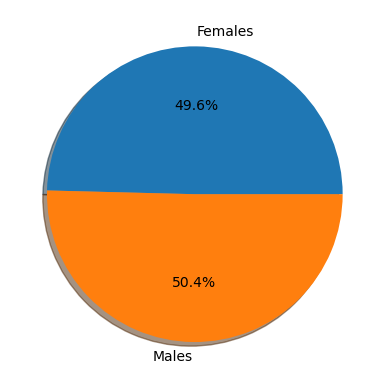

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


In [149]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart

#gender_counts= drop_mouse_id['Sex'].value_counts()
#labels = ["Females", "Males"]
#gender = drop_mouse_id.groupby("Sex")["Mouse ID"].nunique()
#gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], figsize=(4,4))
#plt.ylabel("Distribution of Male vs Female")
#plt.axis('equal')
#plt.show()

labels = ["Females", "Males"]

gender = drop_mouse_id.groupby("Sex")["Mouse ID"].nunique()

# Make the pie chart

plt.pie(gender, labels= labels, autopct="%1.1f%%", shadow=True)

plt.show()

print(gender)

## Quartiles, Outliers and Boxplots

In [152]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = drop_mouse_id.groupby('Mouse ID')['Timepoint'].max().reset_index()

merged_df = pd.merge(last_timepoint_df,  drop_mouse_id, on=['Mouse ID', 'Timepoint'])
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [154]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol_data = []
#outliers =[]
# Calculate the IQR and quantitatively determine if there are any potential outliers.
 # for treatments in treatments: 
   # selected_regi=
    # Locate the rows which contain mice on each drug and get the tumor volumes
#tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    

    # add subset
#tumor_vol_data.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
#Q1 = tumor_volumes.quantile(0.25)
#Q3 = tumor_volumes.quantile(0.75)
#IQR = Q3 - Q1
#Determine outliers using upper and lower bounds
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
#outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
#print(f"{treatment} potential outliers: {outliers.values}")
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

out = []  

tumor_vol_data = []



for drug in treatments:

    drug_data = merged_df.loc[merged_df["Drug Regimen"] == drug]



    tumor_vol_data.append(drug_data["Tumor Volume (mm3)"])

    quartz = drug_data["Tumor Volume (mm3)"].quantile([0.25,0.75])

    low_q = quartz[0.25]

    high_q = quartz[0.75]

    IQR = high_q - low_q

    low_b = low_q - 1.5*IQR

    high_b = high_q - 1.5*IQR



    # tumor_v.extend(drug_data["Tumor Volume (mm3)"])



    outliers = drug_data.loc[(drug_data["Tumor Volume (mm3)"] < low_b) | (drug_data["Tumor Volume (mm3)"] > high_b)]

    out.append(outliers["Tumor Volume (mm3)"])
print(f"{drug} potential outliers: {outliers.values}")

Ceftamin potential outliers: [['a275' 45 'Ceftamin' 'Female' 20 28 62.99935619 3]
 ['b447' 0 'Ceftamin' 'Male' 2 30 45.0 0]
 ['b487' 25 'Ceftamin' 'Female' 6 28 56.05774909 1]
 ['b759' 30 'Ceftamin' 'Female' 12 25 55.74282869 1]
 ['f436' 15 'Ceftamin' 'Female' 3 25 48.72207785 2]
 ['h531' 5 'Ceftamin' 'Male' 5 27 47.7846818 0]
 ['j296' 45 'Ceftamin' 'Female' 24 30 61.84902336 3]
 ['k210' 45 'Ceftamin' 'Male' 15 28 68.92318457 3]
 ['l471' 45 'Ceftamin' 'Female' 7 28 67.74866174 1]
 ['l490' 30 'Ceftamin' 'Male' 24 26 57.91838132 3]
 ['l558' 10 'Ceftamin' 'Female' 13 30 46.78453491 0]
 ['l661' 45 'Ceftamin' 'Male' 18 26 59.85195552 3]
 ['l733' 45 'Ceftamin' 'Female' 4 30 64.29983003 1]
 ['o287' 45 'Ceftamin' 'Male' 2 28 59.74190064 4]
 ['p438' 45 'Ceftamin' 'Female' 11 26 61.43389223 1]
 ['q483' 40 'Ceftamin' 'Male' 6 26 64.19234114 1]
 ['t573' 0 'Ceftamin' 'Female' 15 27 45.0 0]
 ['u149' 25 'Ceftamin' 'Male' 24 29 52.92534846 0]
 ['u153' 0 'Ceftamin' 'Female' 11 25 45.0 0]
 ['w151' 45 'C

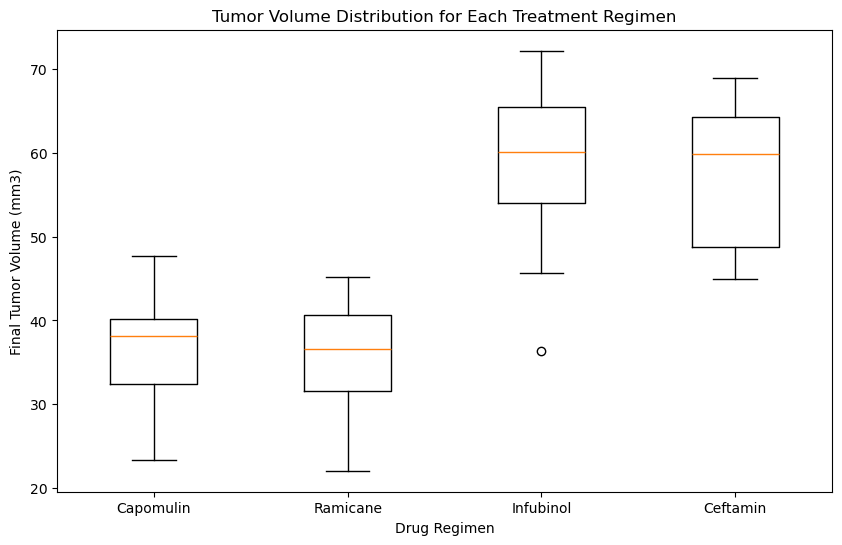

In [158]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data,labels=treatments)
plt.title("Tumor Volume Distribution for Each Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()

<Figure size 1000x600 with 0 Axes>

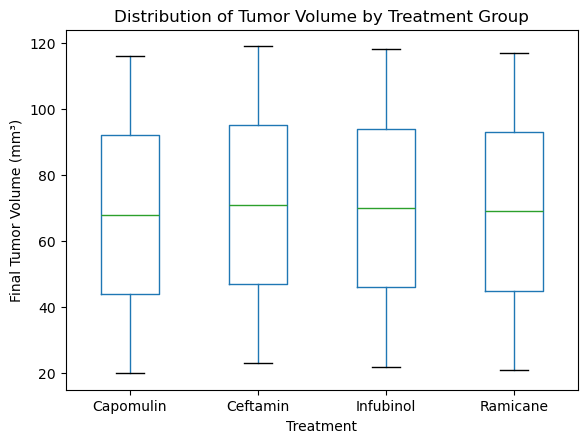

In [160]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatments = {
    'Treatment': ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] * 25,
    'Tumor Volume': [20 + i for i in range(100)]  # Replace with actual tumor volumes
}
df = pd.DataFrame(treatments)

# Create a box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='Tumor Volume', by='Treatment', grid=False)
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.suptitle('')  # Suppress the default title to make it cleaner
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm³)')
plt.show()

## Line and Scatter Plots

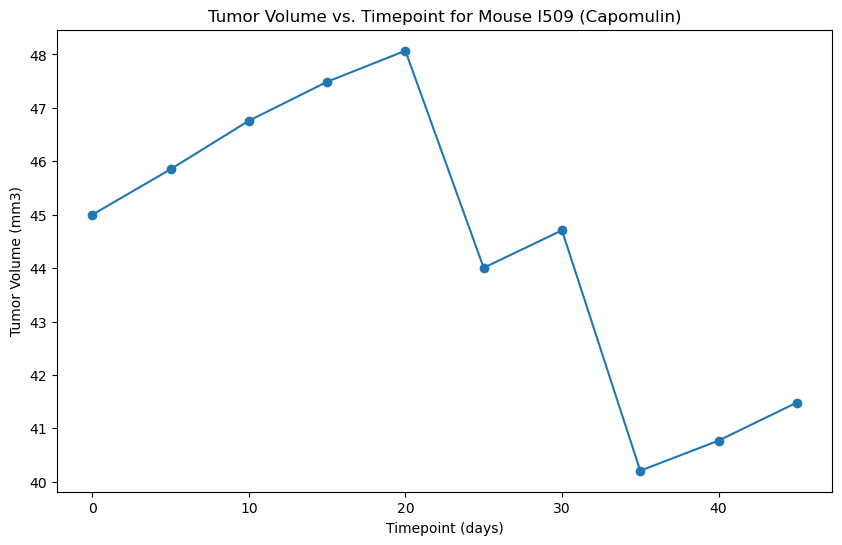

In [113]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_data = combined_data_df[(combined_data_df["Drug Regimen"] == "Capomulin") & (combined_data_df["Mouse ID"] == "l509")]
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title("Tumor Volume vs. Timepoint for Mouse l509 (Capomulin)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

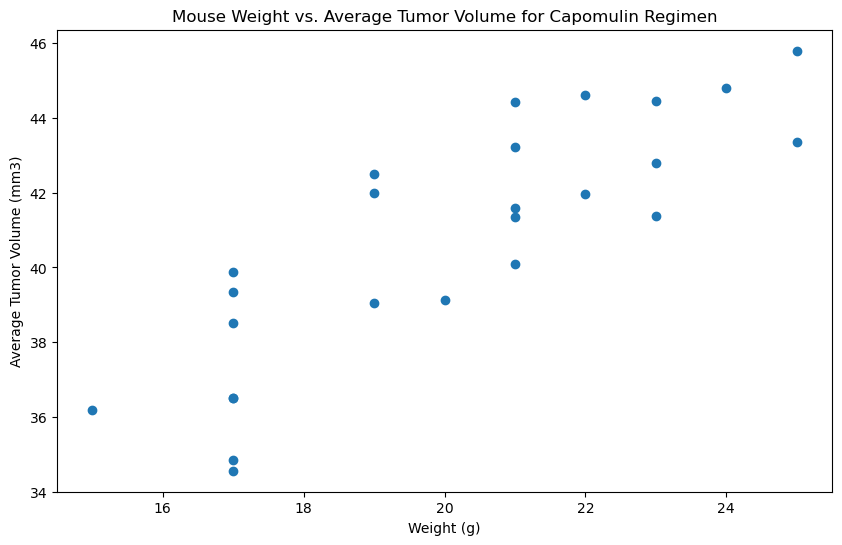

In [115]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_data_df[combined_data_df["Drug Regimen"] == "Capomulin"]

# Calculate the mean of tumor volume and weight by Mouse ID, selecting only numeric columns
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_vol)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

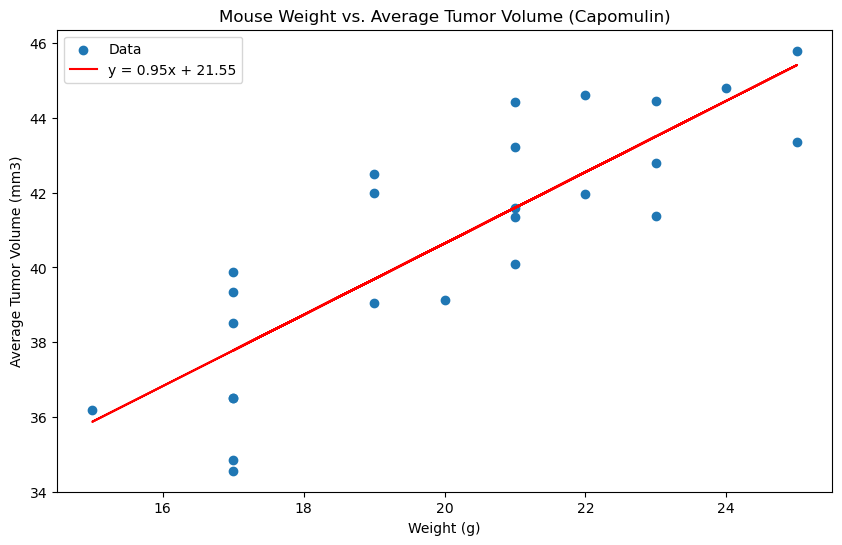

Correlation coefficient between mouse weight and average tumor volume: 0.84


In [118]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume (Capomulin regimen)
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)[0]
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, avg_tumor_vol)
regression_line = slope * mouse_weight + intercept

# Plot the regression line on top of the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_vol, label="Data")
plt.plot(mouse_weight, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title(f"Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.show()

# Print correlation
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")